In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('/content/insurance_claims.csv')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.replace('?', np.nan, inplace = True)

In [5]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

DATA PRE-PROCESSING

In [7]:
!pip install missingno

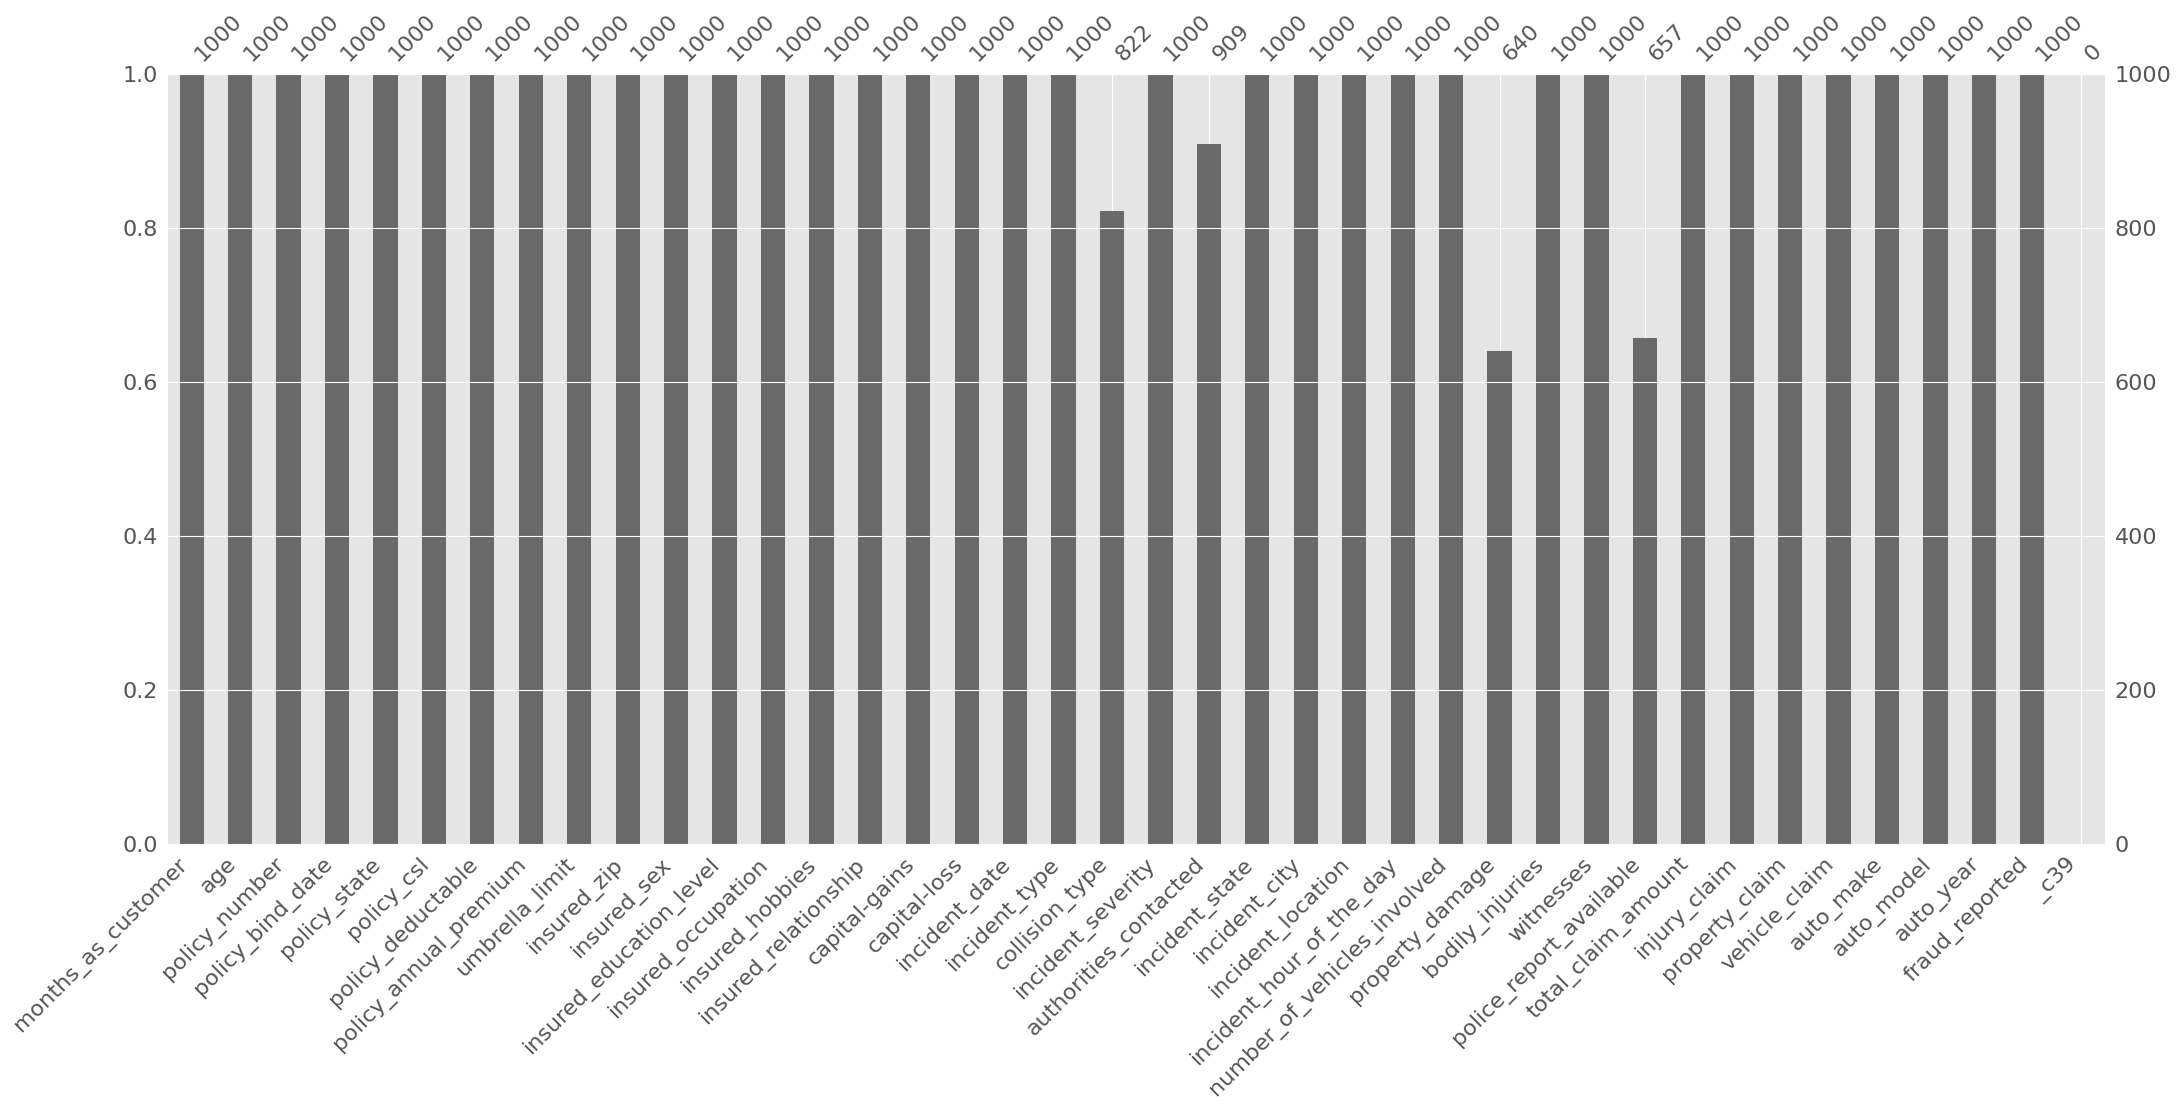

In [8]:
import missingno as msno

msno.bar(df)
plt.show()

HANDLING MISSING VALUES

In [9]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])


In [10]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [11]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [12]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [13]:
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is of object type (potentially string)
        try:
            df[col] = pd.to_datetime(df[col])
        except ValueError:
            # Handle cases where conversion fails (e.g., non-date strings)
            df[col] = df[col].astype('category').cat.codes

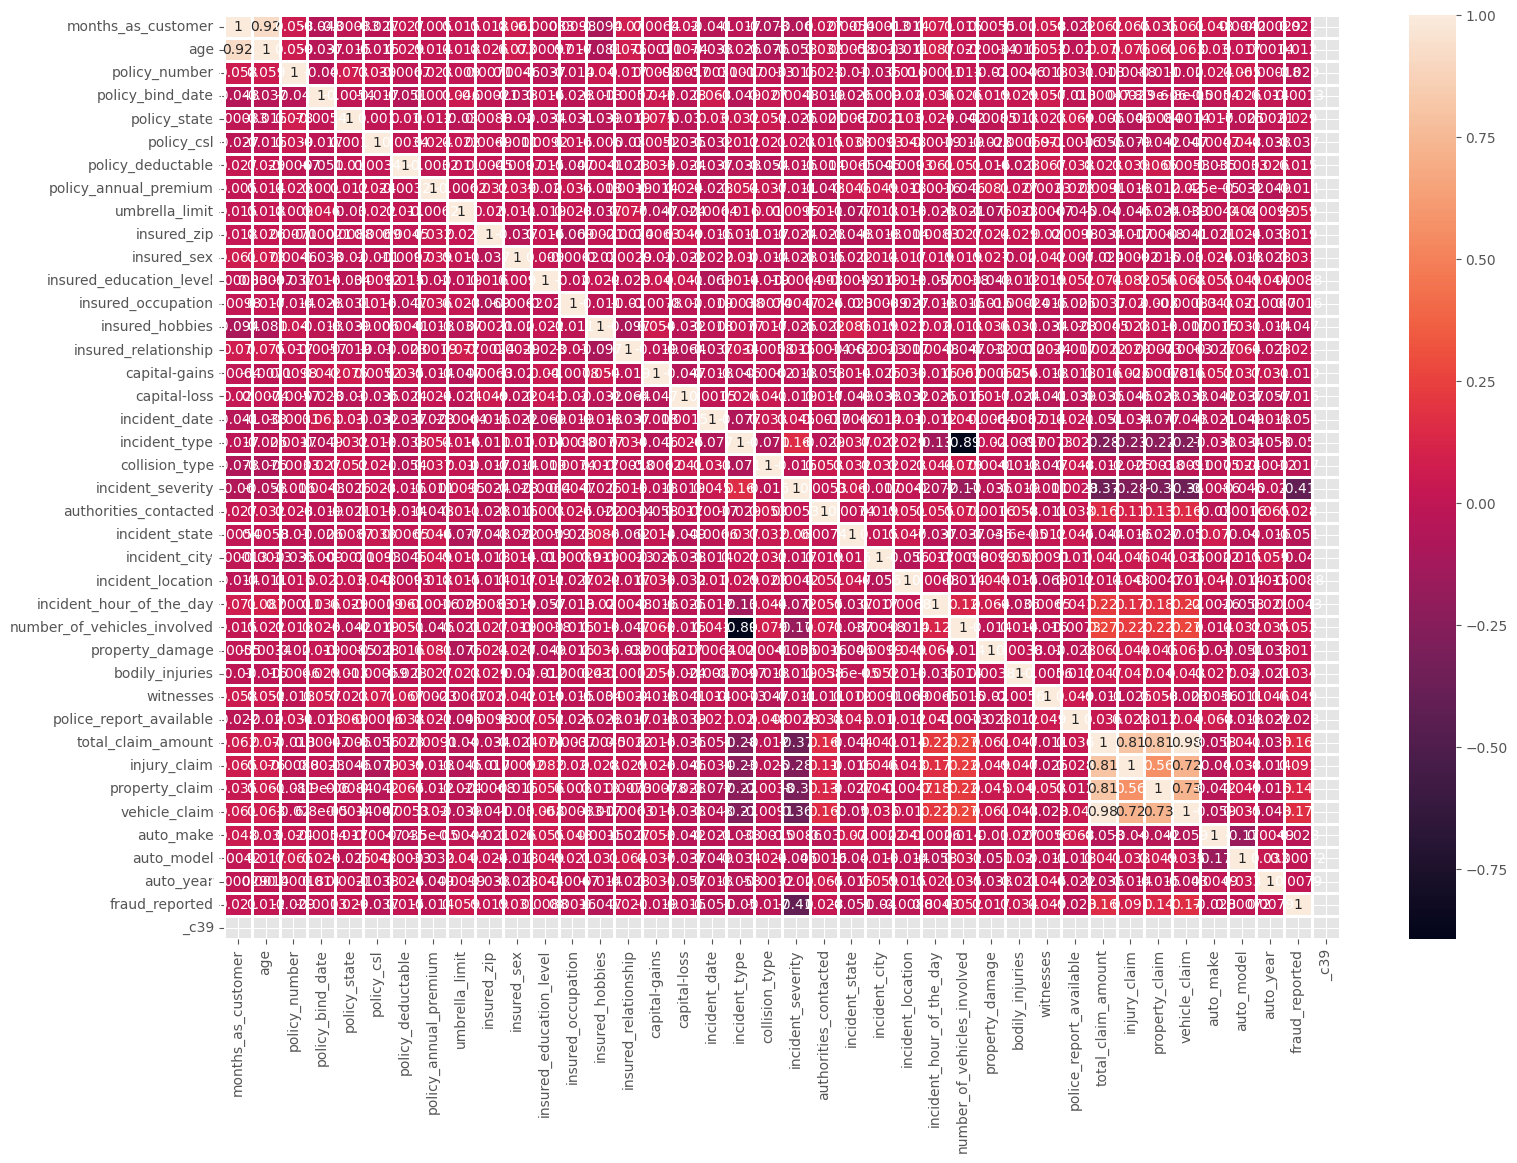

In [14]:
plt.figure(figsize = (18, 12))

corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [15]:
df.nunique()


months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [16]:
to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']

df.drop(to_drop, inplace = True, axis = 1)

In [17]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,1,1000,1406.91,0,1,4,2,0,...,1,1,1,2,1,71610,6510,13020,52080,1
1,228,42,1,2000,1197.22,5000000,1,4,6,2,...,1,0,0,0,0,5070,780,780,3510,1
2,134,29,0,2000,1413.14,5000000,0,6,11,3,...,3,0,2,3,0,34650,7700,3850,23100,0
3,256,41,1,2000,1415.74,6000000,0,6,1,4,...,1,0,1,2,0,63400,6340,6340,50720,1
4,228,44,2,1000,1583.91,6000000,1,0,11,4,...,1,0,0,1,0,6500,1300,650,4550,0


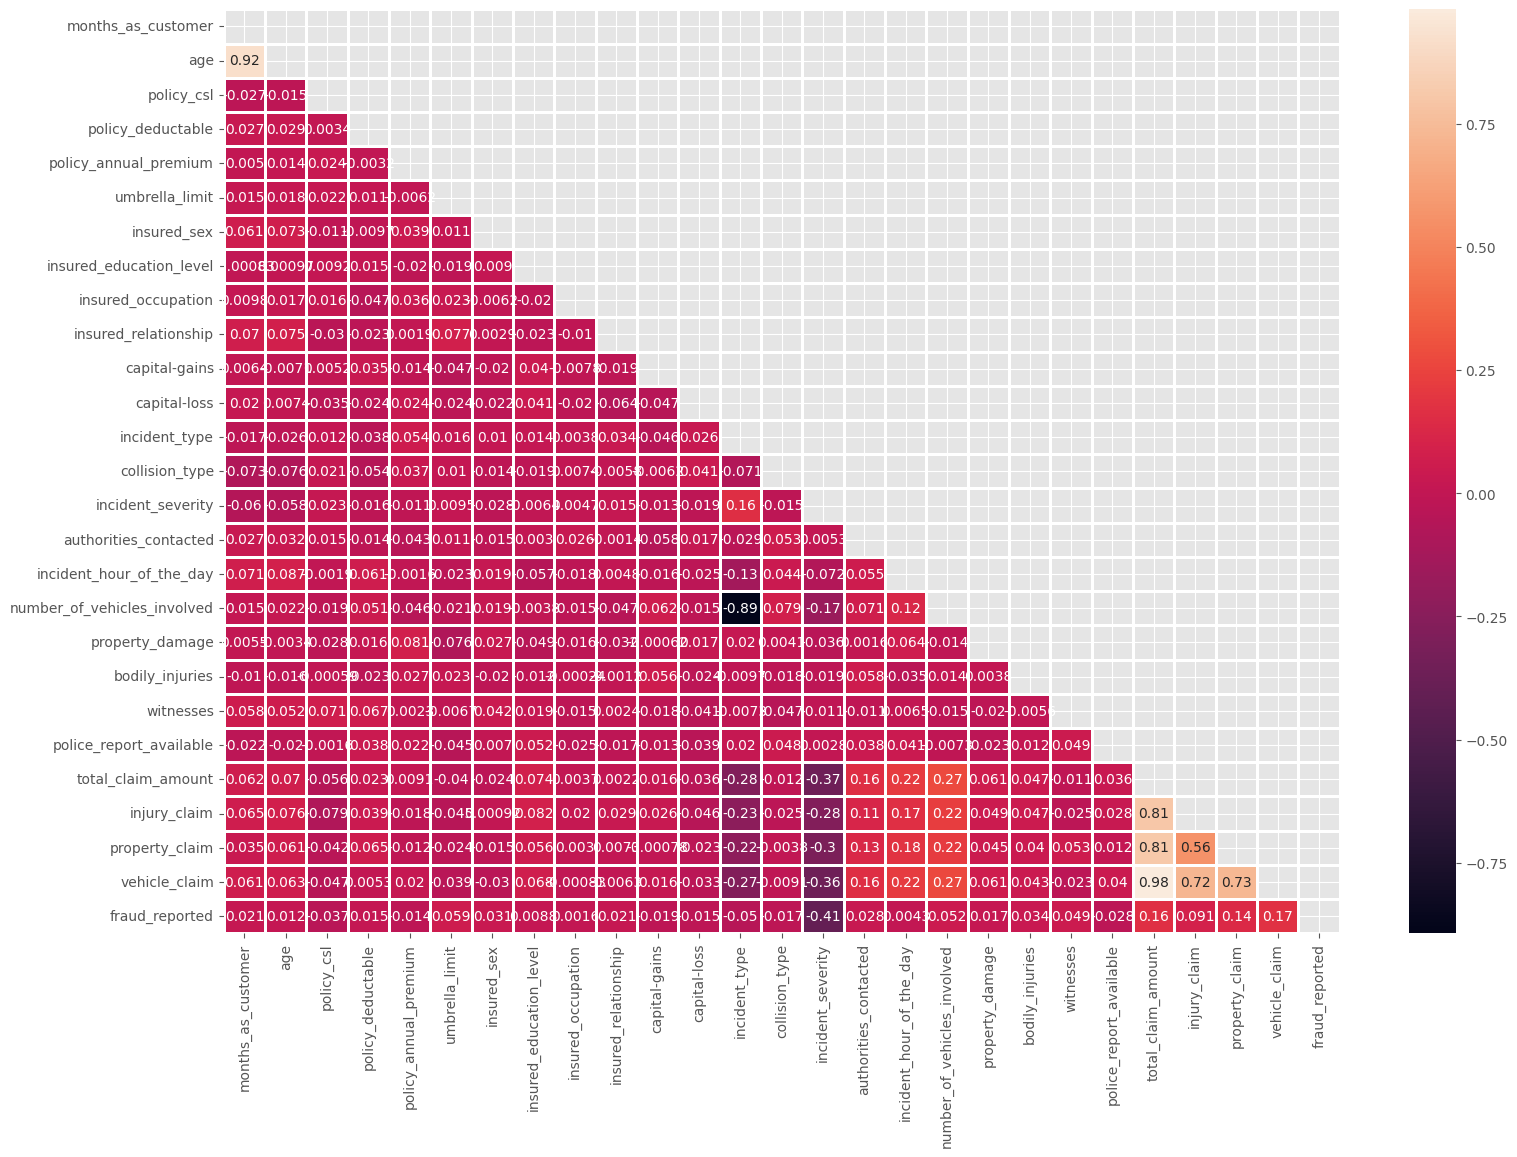

In [18]:
plt.figure(figsize = (18, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [19]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [20]:
df.head()


,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,1,1000,1406.91,0,1,4,2,0,53300,...,5,1,1,1,2,1,6510,13020,52080,1
1,228,1,2000,1197.22,5000000,1,4,6,2,0,...,8,1,0,0,0,0,780,780,3510,1
2,134,0,2000,1413.14,5000000,0,6,11,3,35100,...,7,3,0,2,3,0,7700,3850,23100,0
3,256,1,2000,1415.74,6000000,0,6,1,4,48900,...,5,1,0,1,2,0,6340,6340,50720,1
4,228,2,1000,1583.91,6000000,1,0,11,4,66000,...,20,1,0,0,1,0,1300,650,4550,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   int8   
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   int8   
 6   insured_education_level      1000 non-null   int8   
 7   insured_occupation           1000 non-null   int8   
 8   insured_relationship         1000 non-null   int8   
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   int8   
 12  collision_type               1000 non-null   int8   
 13  incident_severity  

In [22]:
X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

ENCODING CATEGORICAL COLUMNS

In [23]:
cat_df = X.select_dtypes(include = ['object'])

In [24]:
cat_cols = ['policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation',
            'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted']  # Add any other relevant columns

cat_df = X[cat_cols]
cat_df = pd.get_dummies(cat_df, drop_first=True)

In [25]:
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted
0,1,1,4,2,0,2,2,0,3
1,1,1,4,6,2,3,1,1,3
2,0,0,6,11,3,0,1,1,3
3,1,0,6,1,4,2,0,0,3
4,2,1,0,11,4,3,1,1,-1


In [26]:
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

policy_csl: 
[1 0 2]

insured_sex: 
[1 0]

insured_education_level: 
[4 6 0 5 2 1 3]

insured_occupation: 
[ 2  6 11  1 12  9  7  8  3 10 13  5  0  4]

insured_relationship: 
[0 2 3 4 5 1]

incident_type: 
[2 3 0 1]

collision_type: 
[2 1 0]

incident_severity: 
[0 1 2 3]

authorities_contacted: 
[ 3 -1  1  2  0]



In [27]:
print(X.columns)
print(X.head())

Index(['months_as_customer', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')
   months_as_customer  policy_csl  policy_deductable  policy_annual_premium  \
0                 328           1               1000                1406.91   
1                 228           1               2000                1197.22   
2                 134           0               2000                1413.14   
3                 256           1               2000                1415.74   
4                 228        

In [28]:
cat_df = pd.get_dummies(cat_df, drop_first = True)

In [29]:
cat_df = pd.get_dummies(cat_df, drop_first = True)

In [30]:
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted
0,1,1,4,2,0,2,2,0,3
1,1,1,4,6,2,3,1,1,3
2,0,0,6,11,3,0,1,1,3
3,1,0,6,1,4,2,0,0,3
4,2,1,0,11,4,3,1,1,-1


In [31]:
num_df = X.select_dtypes(include = ['int64'])

In [32]:
num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550


In [33]:
X = pd.concat([num_df, cat_df], axis = 1)

In [34]:
X.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,vehicle_claim,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted
0,328,1000,0,53300,0,5,1,1,2,6510,...,52080,1,1,4,2,0,2,2,0,3
1,228,2000,5000000,0,0,8,1,0,0,780,...,3510,1,1,4,6,2,3,1,1,3
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,23100,0,0,6,11,3,0,1,1,3
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,50720,1,0,6,1,4,2,0,0,3
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,4550,2,1,0,11,4,3,1,1,-1


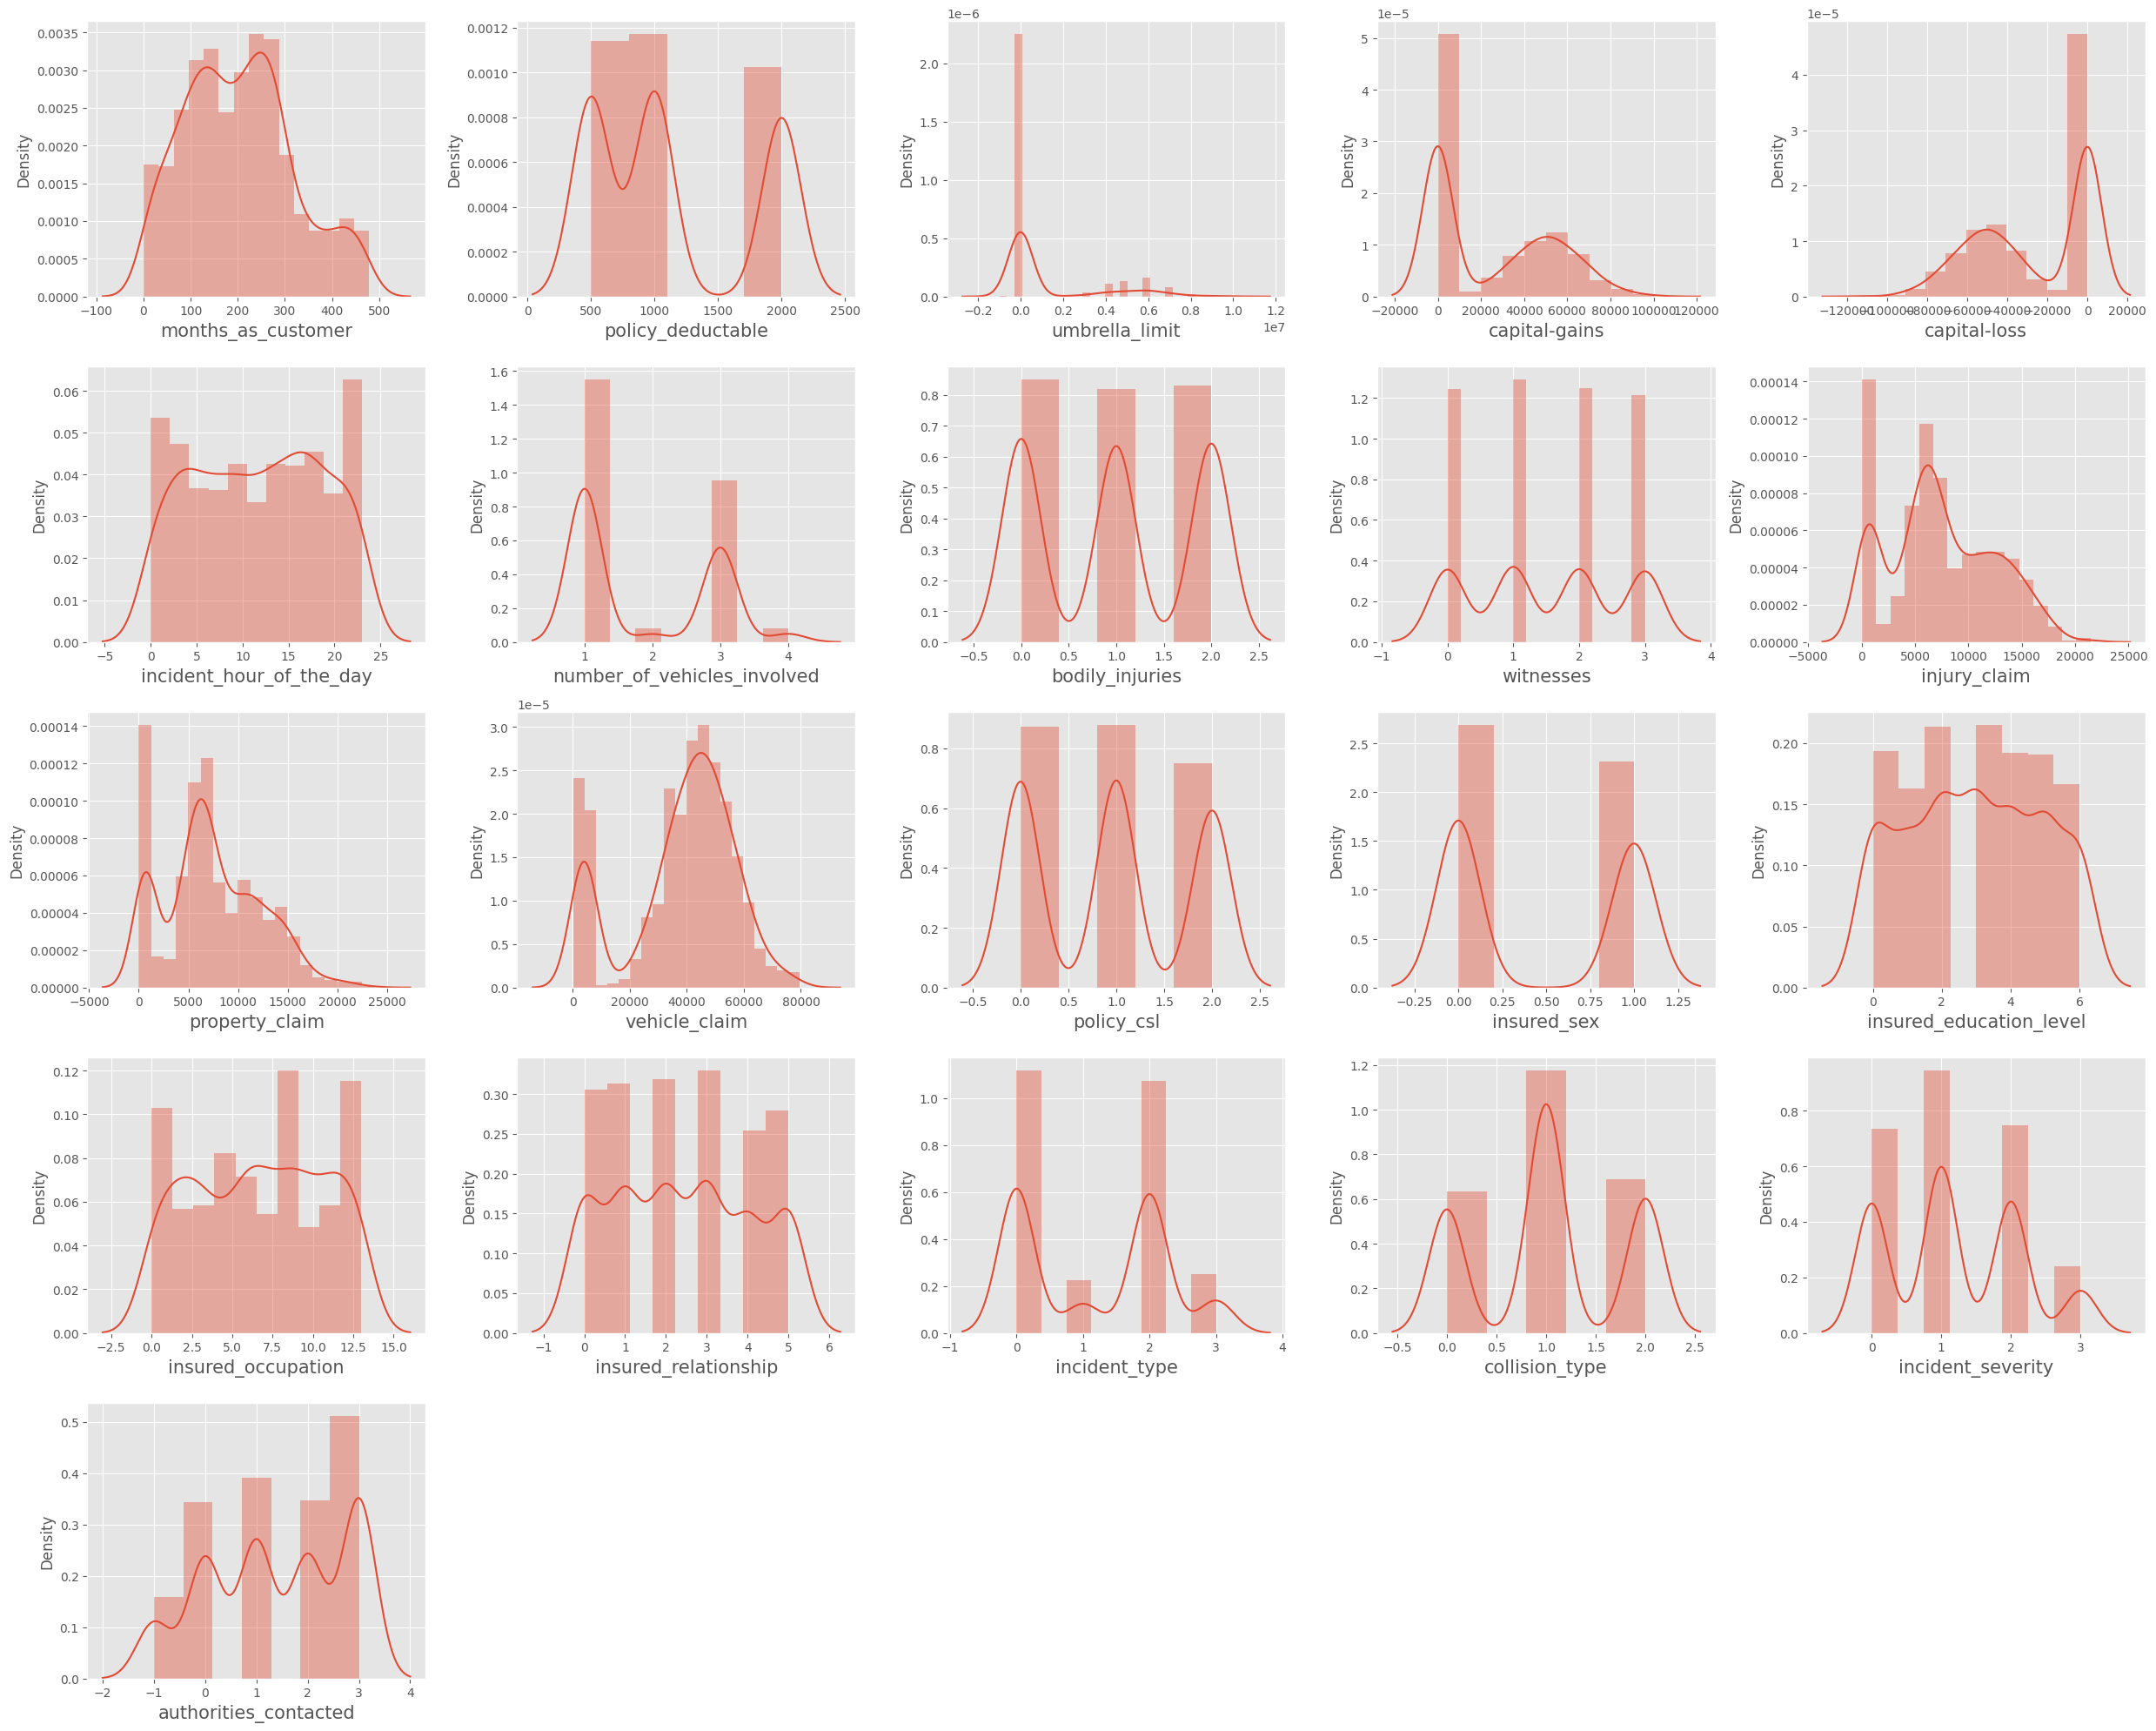

In [35]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()

OUTLIERS DETECTION

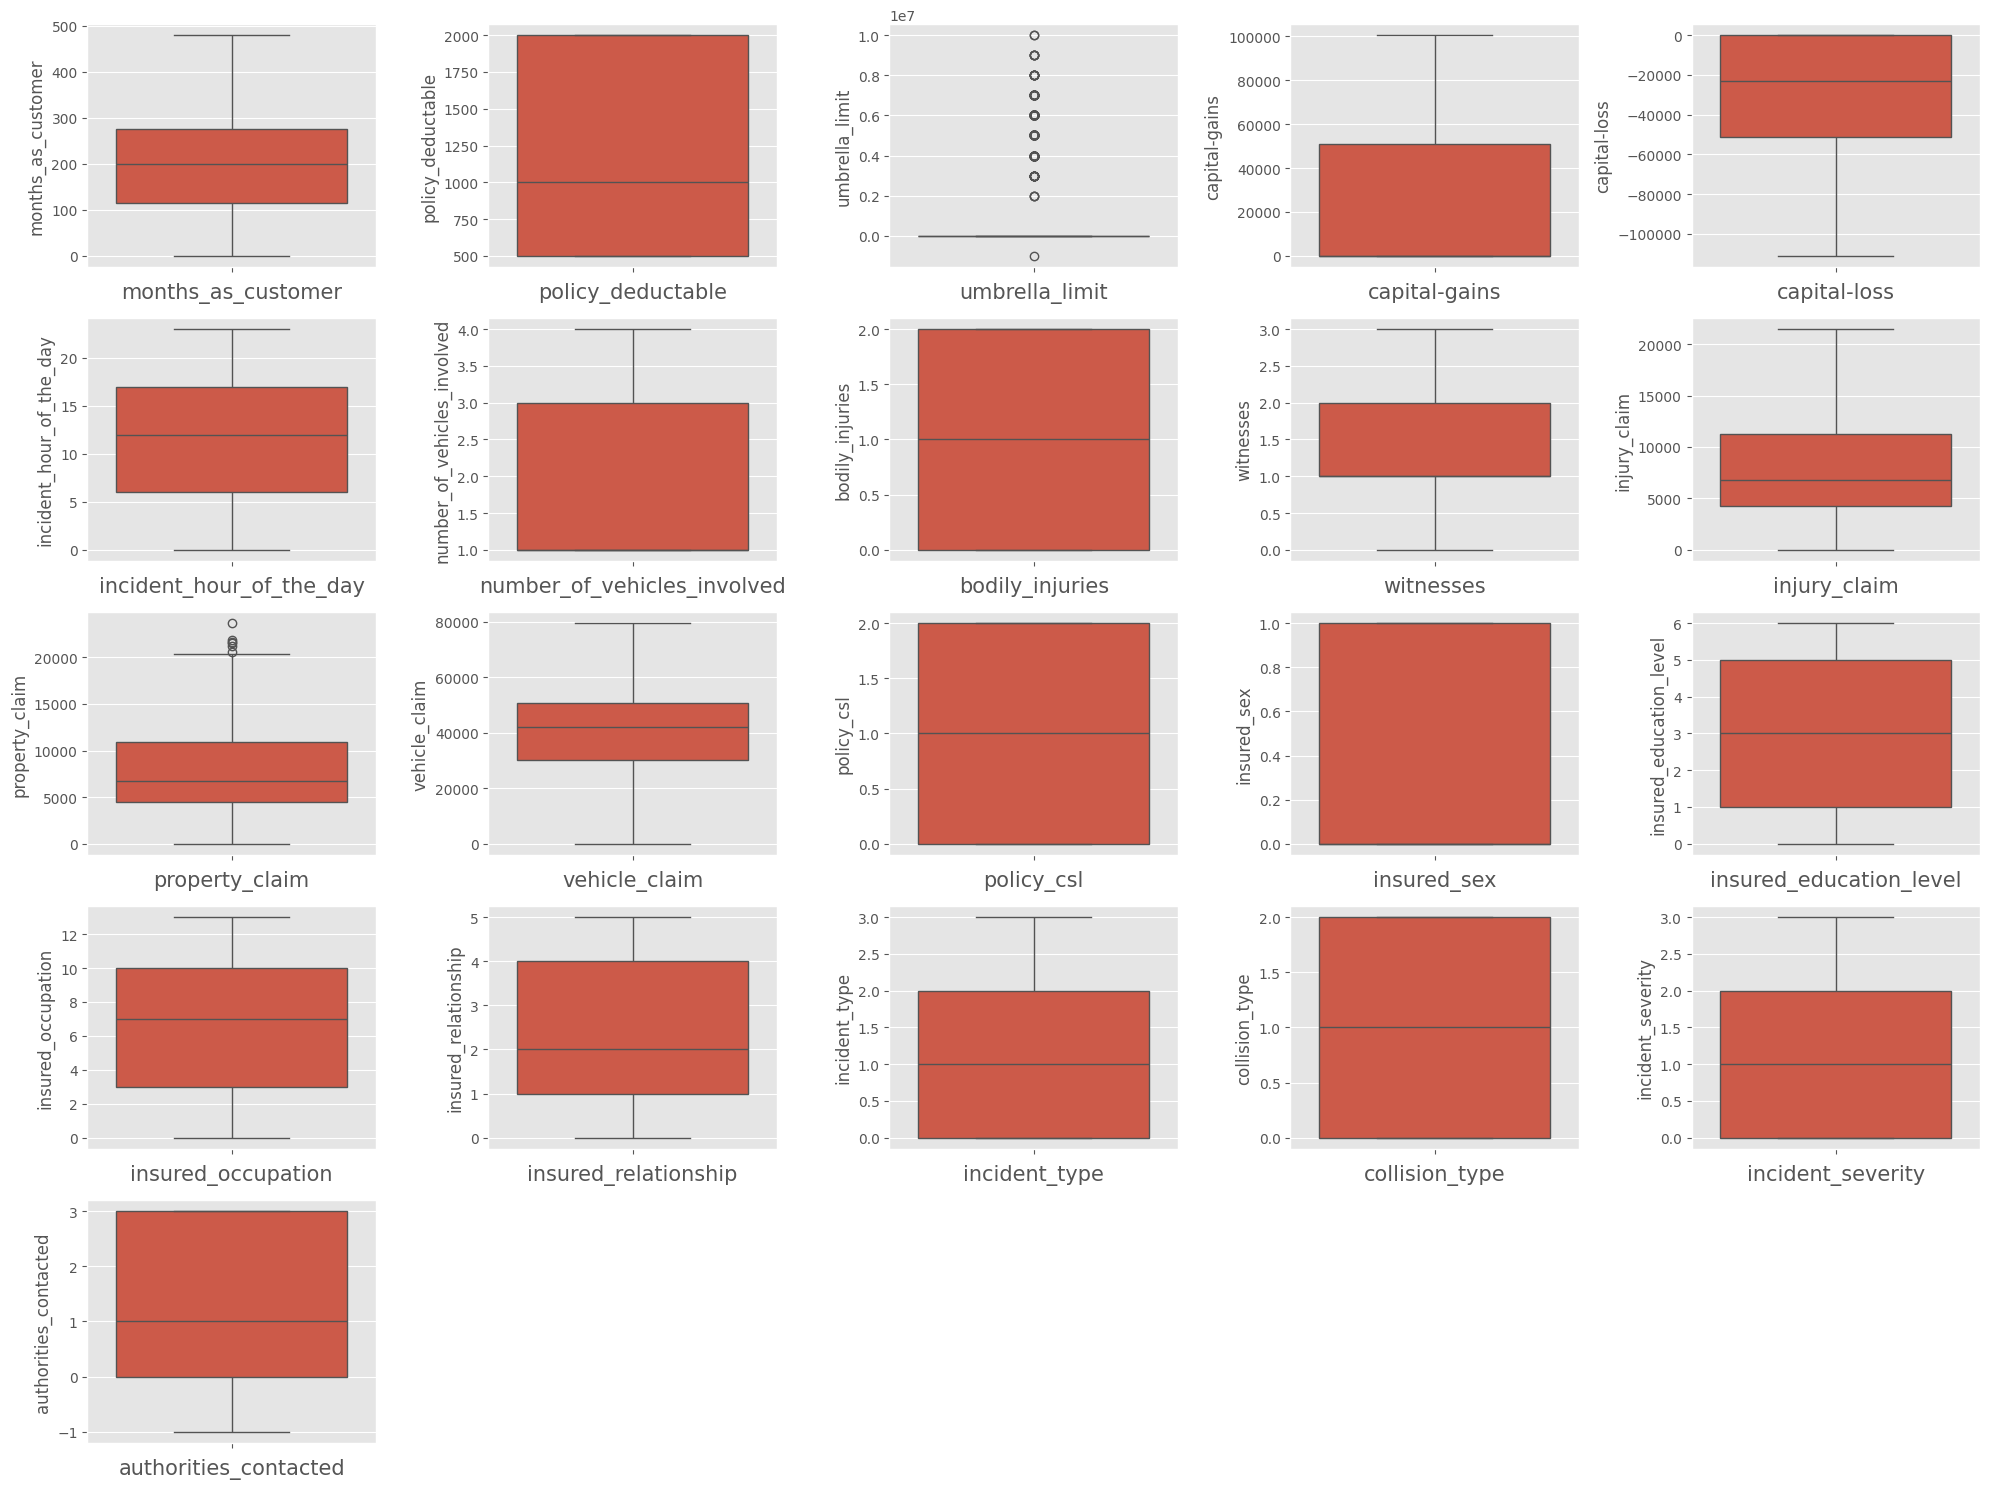

In [36]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1
plt.tight_layout()
plt.show()

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [38]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,vehicle_claim,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted
728,140,1000,5000000,0,0,13,1,2,3,14940,...,59760,1,0,1,10,2,2,2,0,1
392,160,1000,0,0,-36600,5,3,2,1,5170,...,36190,0,0,2,9,0,0,1,2,1
986,232,500,0,0,-58400,11,1,2,3,15400,...,53900,0,1,1,5,1,2,1,1,2
916,186,500,0,70300,-70900,7,1,1,1,400,...,2800,0,1,2,0,0,3,1,3,-1
404,437,1000,0,48800,0,10,1,1,3,7680,...,61440,2,0,1,1,4,2,0,1,2


In [39]:
num_df = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [40]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

In [41]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
728,-0.558233,-0.241946,1.690841,-0.931431,0.984549,0.218119,-0.827516,1.212252,1.360009,1.557327,0.051295,1.182670
392,-0.385101,-0.241946,-0.482104,-0.931431,-0.321787,-0.940037,1.142760,1.212252,-0.458185,-0.455655,0.661238,-0.074356
986,0.238171,-1.055664,-0.482104,-0.931431,-1.099877,-0.071420,-0.827516,1.212252,1.360009,1.652104,0.100175,0.870146
916,-0.160031,-1.055664,-0.482104,1.587816,-1.546030,-0.650498,-0.827516,-0.001618,-0.458185,-1.438452,-1.451249,-1.855099
404,2.012765,-0.241946,-0.482104,0.817349,0.984549,-0.216189,-0.827516,-0.001618,1.360009,0.061498,1.728108,1.272267


In [42]:
X_train.drop(columns = scaled_num_df.columns, inplace = True)

In [43]:
X_train = pd.concat([scaled_num_df, X_train], axis = 1)

In [44]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,vehicle_claim,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted
728,-0.558233,-0.241946,1.690841,-0.931431,0.984549,0.218119,-0.827516,1.212252,1.360009,1.557327,...,1.182670,1,0,1,10,2,2,2,0,1
392,-0.385101,-0.241946,-0.482104,-0.931431,-0.321787,-0.940037,1.142760,1.212252,-0.458185,-0.455655,...,-0.074356,0,0,2,9,0,0,1,2,1
986,0.238171,-1.055664,-0.482104,-0.931431,-1.099877,-0.071420,-0.827516,1.212252,1.360009,1.652104,...,0.870146,0,1,1,5,1,2,1,1,2
916,-0.160031,-1.055664,-0.482104,1.587816,-1.546030,-0.650498,-0.827516,-0.001618,-0.458185,-1.438452,...,-1.855099,0,1,2,0,0,3,1,3,-1
404,2.012765,-0.241946,-0.482104,0.817349,0.984549,-0.216189,-0.827516,-0.001618,1.360009,0.061498,...,1.272267,2,0,1,1,4,2,0,1,2


svm

In [45]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Support Vector Classifier is : 0.7546666666666667
Test accuracy of Support Vector Classifier is : 0.748
[[187   0]
 [ 63   0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       187
           1       0.00      0.00      0.00        63

    accuracy                           0.75       250
   macro avg       0.37      0.50      0.43       250
weighted avg       0.56      0.75      0.64       250



KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of KNN is : 0.764
Test accuracy of KNN is : 0.748
[[187   0]
 [ 63   0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       187
           1       0.00      0.00      0.00        63

    accuracy                           0.75       250
   macro avg       0.37      0.50      0.43       250
weighted avg       0.56      0.75      0.64       250



Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.64
[[149  38]
 [ 52  11]]
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       187
           1       0.22      0.17      0.20        63

    accuracy                           0.64       250
   macro avg       0.48      0.49      0.48       250
weighted avg       0.61      0.64      0.62       250



In [51]:
# hyper parameter tuning

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [52]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 9, 'min_samples_split': 2}
0.8


In [53]:
dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 0.8306666666666667
Test accuracy of Decision Tree is : 0.804
[[161  26]
 [ 23  40]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       187
           1       0.61      0.63      0.62        63

    accuracy                           0.80       250
   macro avg       0.74      0.75      0.74       250
weighted avg       0.81      0.80      0.81       250



Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)


In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest is : 0.9613333333333334
Test accuracy of Random Forest is : 0.752
[[177  10]
 [ 52  11]]
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       187
           1       0.52      0.17      0.26        63

    accuracy                           0.75       250
   macro avg       0.65      0.56      0.56       250
weighted avg       0.71      0.75      0.70       250



Ada Boost Classifier

In [57]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                                min_samples_leaf=9)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [58]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 50}
0.8


In [59]:
ada = grid_search.best_estimator_

y_pred = ada.predict(X_test)

In [60]:
# accuracy_score, confusion_matrix and classification_report

ada_train_acc = accuracy_score(y_train, ada.predict(X_train))
ada_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Ada Boost is : {ada_train_acc}")
print(f"Test accuracy of Ada Boost is : {ada_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Ada Boost is : 0.8186666666666667
Test accuracy of Ada Boost is : 0.812
[[161  26]
 [ 21  42]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       187
           1       0.62      0.67      0.64        63

    accuracy                           0.81       250
   macro avg       0.75      0.76      0.76       250
weighted avg       0.82      0.81      0.81       250



Gradient Boosting Classifier

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 0.9306666666666666
Test Accuracy of Gradient Boosting Classifier is 0.56 

Confusion Matrix :- 
[[113  74]
 [ 36  27]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.76      0.60      0.67       187
           1       0.27      0.43      0.33        63

    accuracy                           0.56       250
   macro avg       0.51      0.52      0.50       250
weighted avg       0.63      0.56      0.59       250



Stochastic Gradient Boosting

In [62]:
sgb = GradientBoostingClassifier(subsample = 0.90, max_features = 0.70)
sgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")


Training Accuracy of Stochastic Gradient Boosting is 0.936
Test Accuracy of Stochastic Gradient Boosting is 0.684 

Confusion Matrix :- 
[[147  40]
 [ 39  24]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.79      0.79      0.79       187
           1       0.38      0.38      0.38        63

    accuracy                           0.68       250
   macro avg       0.58      0.58      0.58       250
weighted avg       0.69      0.68      0.68       250



XgBoost Classifier


In [63]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

In [64]:
# accuracy_score, confusion_matrix and classification_report

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of XgBoost is : 1.0
Test accuracy of XgBoost is : 0.756
[[180   7]
 [ 54   9]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.86       187
           1       0.56      0.14      0.23        63

    accuracy                           0.76       250
   macro avg       0.67      0.55      0.54       250
weighted avg       0.72      0.76      0.70       250



In [67]:
param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 10, 1)}

grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                                min_samples_leaf=9)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [68]:
xgb = grid_search.best_estimator_

y_pred = xgb.predict(X_test)

In [69]:
xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of XgBoost is : 0.324
Test accuracy of XgBoost is : 0.248
[[  0 187]
 [  1  62]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       187
           1       0.25      0.98      0.40        63

    accuracy                           0.25       250
   macro avg       0.12      0.49      0.20       250
weighted avg       0.06      0.25      0.10       250



In [70]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.3 MB/s eta 0:00:00


CAT BOOST CLASSIFIER

In [71]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 0.4862378	total: 50ms	remaining: 450ms
1:	learn: 0.4160546	total: 55.3ms	remaining: 221ms
2:	learn: 0.3662550	total: 59.6ms	remaining: 139ms
3:	learn: 0.3392864	total: 66.9ms	remaining: 100ms
4:	learn: 0.3261546	total: 72.9ms	remaining: 72.9ms
5:	learn: 0.3125943	total: 78.4ms	remaining: 52.3ms
6:	learn: 0.2932981	total: 83.7ms	remaining: 35.9ms
7:	learn: 0.2789401	total: 89.8ms	remaining: 22.5ms
8:	learn: 0.2625746	total: 94ms	remaining: 10.4ms
9:	learn: 0.2460034	total: 97ms	remaining: 0us


In [78]:
cat_acc = accuracy_score(y_test, cat.predict(X_test))

print(f"Training Accuracy of Cat Boost Classifier is {accuracy_score(y_train, cat.predict(X_train))}")
print(f"Test Accuracy of Cat Boost Classifier is {cat_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, cat.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, cat.predict(X_test))}")

Training Accuracy of Cat Boost Classifier is 0.916
Test Accuracy of Cat Boost Classifier is 0.784 

Confusion Matrix :- 
[[179   8]
 [ 46  17]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.80      0.96      0.87       187
           1       0.68      0.27      0.39        63

    accuracy                           0.78       250
   macro avg       0.74      0.61      0.63       250
weighted avg       0.77      0.78      0.75       250



Extra Trees Classifier

In [79]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.748 

Confusion Matrix :- 
[[184   3]
 [ 60   3]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.75      0.98      0.85       187
           1       0.50      0.05      0.09        63

    accuracy                           0.75       250
   macro avg       0.63      0.52      0.47       250
weighted avg       0.69      0.75      0.66       250



LGBM CLASSIFIER

In [80]:
!pip install lightgbm

In [81]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")

print(f"{confusion_matrix(y_test, lgbm.predict(X_test))}\n")
print(classification_report(y_test, lgbm.predict(X_test)))

[LightGBM] [Info] Number of positive: 184, number of negative: 566
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1354
[LightGBM] [Info] Number of data points in the train set: 750, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.245333 -> initscore=-1.123658
[LightGBM] [Info] Start training from score -1.123658
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

Voting Classifier

In [82]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Support Vector Classifier', svc), ('KNN', knn),  ('Decision Tree', dtc), ('Random Forest', rand_clf),
               ('Ada Boost', ada), ('XGboost', xgb), ('Gradient Boosting Classifier', gb), ('SGB', sgb),
               ('Cat Boost', cat), ('Extra Trees Classifier', etc), ('LGBM', lgbm)]

vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)

Learning rate set to 0.5
0:	learn: 0.4862378	total: 2.37ms	remaining: 21.4ms
1:	learn: 0.4160546	total: 12.4ms	remaining: 49.7ms
2:	learn: 0.3662550	total: 20.2ms	remaining: 47.2ms
3:	learn: 0.3392864	total: 22.5ms	remaining: 33.7ms
4:	learn: 0.3261546	total: 38.4ms	remaining: 38.4ms
5:	learn: 0.3125943	total: 65.5ms	remaining: 43.6ms
6:	learn: 0.2932981	total: 72.3ms	remaining: 31ms
7:	learn: 0.2789401	total: 90ms	remaining: 22.5ms
8:	learn: 0.2625746	total: 93.2ms	remaining: 10.4ms
9:	learn: 0.2460034	total: 96.7ms	remaining: 0us
[LightGBM] [Info] Number of positive: 184, number of negative: 566
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1354
[LightGBM] [Info] Number of data points in the train set: 750, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.245333 -> initscore=-1.123658
[LightGBM] [Info] Start trai

In [83]:
vc_train_acc = accuracy_score(y_train, vc.predict(X_train))
vc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Voting Classifier is : {vc_train_acc}")
print(f"Test accuracy of Voting Classifier is : {vc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Voting Classifier is : 0.94
Test accuracy of Voting Classifier is : 0.776
[[181   6]
 [ 50  13]]
              precision    recall  f1-score   support

           0       0.78      0.97      0.87       187
           1       0.68      0.21      0.32        63

    accuracy                           0.78       250
   macro avg       0.73      0.59      0.59       250
weighted avg       0.76      0.78      0.73       250



MODELS COMPARISON

In [84]:
models = pd.DataFrame({
    'Model' : ['SVC', 'KNN', 'Decision Tree', 'Random Forest','Ada Boost', 'Gradient Boost', 'SGB', 'Cat Boost', 'Extra Trees', 'LGBM', 'XgBoost', 'Voting Classifier'],
    'Score' : [svc_test_acc, knn_test_acc, dtc_test_acc, rand_clf_test_acc, ada_test_acc, gb_acc, sgb_acc, cat_acc, etc_acc, lgbm_acc, xgb_test_acc, vc_test_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Ada Boost,0.812
2,Decision Tree,0.804
7,Cat Boost,0.784
11,Voting Classifier,0.776
9,LGBM,0.756
3,Random Forest,0.752
0,SVC,0.748
1,KNN,0.748
8,Extra Trees,0.748
6,SGB,0.684


In [86]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark',
       title = 'Models Comparison')
